In [30]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

In [31]:
data = np.loadtxt('ex7_Jacobi_capacitor.txt')
L = data[:,0]
Iteraçoes = data[:,1]
data2 = np.loadtxt('ex7_overrelax_capacitor.txt')
L2 = data2[:,0]
Iteraçoes2 = data2[:,1]

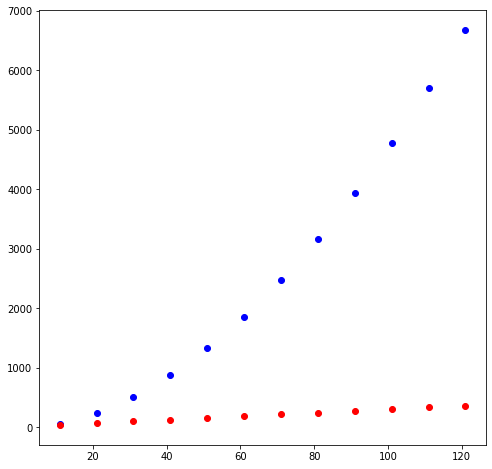

In [32]:
plt.plot(L, Iteraçoes, 'bo')
plt.plot(L2, Iteraçoes2, 'ro')

In [33]:
def parabola(L,amp):
    return amp*(L**2)

In [34]:
def reta(L,amp):
    return amp*(L)

In [35]:
from scipy.optimize import curve_fit
import math

In [36]:
pars, cov = curve_fit(f=parabola, xdata=L, ydata=Iteraçoes, p0=1, bounds=(-np.inf, np.inf))

In [37]:
'Calculando R^2'
res = Iteraçoes - parabola(L, *pars)
ss_res = np.sum(res**2)
ss_tot = np.sum((Iteraçoes-np.mean(Iteraçoes))**2)
r_squared = 1 - (ss_res / ss_tot)
print('R^2 =', r_squared)

R^2 = 0.9982612565579194


In [38]:
pars2, cov2 = curve_fit(f=reta, xdata=L2, ydata=Iteraçoes2, p0=1, bounds=(-np.inf, np.inf))

In [39]:
'Calculando R^2'
res2 = Iteraçoes2 - reta(L2, *pars2)
ss_res2 = np.sum(res2**2)
ss_tot2 = np.sum((Iteraçoes2-np.mean(Iteraçoes2))**2)
r_squared2 = 1 - (ss_res2 / ss_tot2)
print('R^2 =', r_squared2)

R^2 = 0.9993895524038099


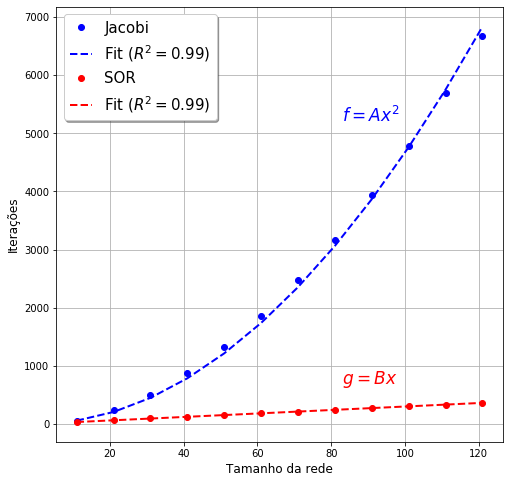

In [40]:
plt.plot(L, Iteraçoes, 'bo')
plt.plot(L, parabola(L, *pars), linestyle='--', linewidth=2, color='blue')
plt.plot(L2, Iteraçoes2, 'ro')
plt.plot(L2, reta(L2, *pars2), linestyle='--', linewidth=2, color='red')
plt.legend(("Jacobi", "Fit ($R^2=0.99$)", "SOR", "Fit ($R^2=0.99$)"), shadow=True, handlelength=1.5, fontsize=15)
plt.grid()
plt.rcParams['figure.figsize'] = (8,8)
plt.text(83, 5200, '$f = Ax^2$', {'color': 'blue', 'fontsize': 17})
plt.text(83, 700, '$g = Bx$', {'color': 'red', 'fontsize': 17})
plt.xlabel("Tamanho da rede", fontsize=12)
plt.ylabel("Iterações", fontsize=12)
#plt.savefig('SOR')